In [1]:
import pandas as pd

In [2]:
df_lyon = pd.read_csv('listings_paris.csv', sep=',', encoding='utf-8')
df_paris = pd.read_csv('listings_paris.csv', sep=',', encoding='utf-8')

In [3]:
df_lyon.columns == df_paris.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [4]:
# Liste des colonnes peu pertinentes pour la prédiction du prix
cols_to_drop = [
    'host_acceptance_rate',
    'host_response_rate',
    'host_response_time',
    'listing_url',
    'scrape_id',
    'source',
    'last_scraped',
    'host_since',
    'neighborhood_overview',
    'picture_url',
    'host_url',
    'host_name',
    'host_location',
    'host_is_superhost',
    'host_about',
    'host_thumbnail_url',
    'host_picture_url',
    'host_neighbourhood',
    'host_verifications',
    'neighbourhood',
    'neighbourhood_cleansed',
    'neighbourhood_group_cleansed',
    'room_type',
    'bathrooms_text',
    'bedrooms',
    'minimum_nights',
    'maximum_nights',
    'minimum_minimum_nights',
    'maximum_minimum_nights',
    'minimum_maximum_nights',
    'maximum_maximum_nights',
    'minimum_nights_avg_ntm',
    'maximum_nights_avg_ntm',
    'calendar_updated',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'calendar_last_scraped',
    'number_of_reviews',
    'number_of_reviews_ltm',
    'number_of_reviews_l30d',
    'first_review',
    'last_review',
    'license',
    'instant_bookable',
    'calculated_host_listings_count',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms'
]

# Suppression des colonnes non pertinentes
df_paris.drop(columns=cols_to_drop, inplace=True)
df_lyon.drop(columns=cols_to_drop, inplace=True)

In [5]:
df_paris.drop(columns=['description'], inplace=True)
df_lyon.drop(columns=['description'], inplace=True)

In [6]:
df = pd.concat([df_paris, df_lyon], ignore_index=True)

In [7]:
df

,id,name,host_id,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,...,price,has_availability,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,3109,zen and calm,3631,1.0,1.0,t,t,48.831910,2.318700,Entire rental unit,...,$100.00,t,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.05
1,5396,Your perfect Paris studio on Île Saint-Louis,7903,2.0,4.0,t,t,48.852470,2.358350,Entire rental unit,...,$88.00,t,4.62,4.64,4.59,4.82,4.85,4.96,4.59,2.26
2,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,2.0,10.0,t,t,48.859090,2.353150,Entire rental unit,...,$136.00,t,4.73,4.81,4.45,4.92,4.89,4.94,4.74,2.20
3,7964,Sunny apartment with balcony,22155,1.0,1.0,t,t,48.874170,2.342450,Entire rental unit,...,NaN,t,4.80,5.00,5.00,5.00,5.00,5.00,5.00,0.03
4,9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",28422,2.0,4.0,t,t,48.858980,2.347010,Entire rental unit,...,$75.00,t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182057,1304562779094087796,Studio ensoleillé sur Canal,38574929,1.0,2.0,f,t,48.888360,2.382689,Entire rental unit,...,$100.00,t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182058,1304667478167694444,Studio bohémien,595527331,1.0,1.0,f,t,48.864770,2.391108,Entire rental unit,...,$80.00,t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182059,1305050902233494632,Cozy Apartment - Marais - Pelee,156775524,108.0,114.0,t,t,48.859996,2.369208,Entire rental unit,...,$818.00,t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182060,1305061192394005038,Cozy Apartment - Tour Eiffel - Finlay,156775524,108.0,114.0,t,t,48.852970,2.288317,Entire rental unit,...,$840.00,t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)
print(df.shape)

id                              0.000000
name                            0.000000
host_id                         0.000000
host_listings_count             0.009887
host_total_listings_count       0.009887
host_has_profile_pic            0.009887
host_identity_verified          0.009887
latitude                        0.000000
longitude                       0.000000
property_type                   0.000000
accommodates                    0.000000
bathrooms                      33.963155
beds                           34.149905
amenities                       0.000000
price                          33.986224
has_availability                4.943371
review_scores_rating           26.205359
review_scores_accuracy         26.218541
review_scores_cleanliness      26.215245
review_scores_checkin          26.226231
review_scores_communication    26.216344
review_scores_location         26.225132
review_scores_value            26.227329
reviews_per_month              26.205359
dtype: float64
(

In [9]:
# Imputation des valeurs manquantes avec la médiane
columns_to_impute = [
    'host_listings_count',
    'host_total_listings_count',
    'host_has_profile_pic',
    'host_identity_verified',
    'property_type',
    'accommodates',
    'bathrooms'
]

for column in columns_to_impute:
    if df[column].dtype in ['float64', 'int64']:
        df[column].fillna(df[column].median(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

C:\Users\yohar\AppData\Local\Temp\ipykernel_28156\2407239252.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\yohar\AppData\Local\Temp\ipykernel_28156\2407239252.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [10]:
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)
print(df.shape)

id                              0.000000
name                            0.000000
host_id                         0.000000
host_listings_count             0.000000
host_total_listings_count       0.000000
host_has_profile_pic            0.000000
host_identity_verified          0.000000
latitude                        0.000000
longitude                       0.000000
property_type                   0.000000
accommodates                    0.000000
bathrooms                       0.000000
beds                           34.149905
amenities                       0.000000
price                          33.986224
has_availability                4.943371
review_scores_rating           26.205359
review_scores_accuracy         26.218541
review_scores_cleanliness      26.215245
review_scores_checkin          26.226231
review_scores_communication    26.216344
review_scores_location         26.225132
review_scores_value            26.227329
reviews_per_month              26.205359
dtype: float64
(

In [11]:
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        df[column].fillna(df[column].min(), inplace=True)
    else:
        df[column].fillna('', inplace=True)  # Pour les colonnes non numériques, on remplace par une chaîne vide

C:\Users\yohar\AppData\Local\Temp\ipykernel_28156\1202095039.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].min(), inplace=True)
C:\Users\yohar\AppData\Local\Temp\ipykernel_28156\1202095039.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [12]:
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)
print(df.shape)

id                             0.0
name                           0.0
host_id                        0.0
host_listings_count            0.0
host_total_listings_count      0.0
host_has_profile_pic           0.0
host_identity_verified         0.0
latitude                       0.0
longitude                      0.0
property_type                  0.0
accommodates                   0.0
bathrooms                      0.0
beds                           0.0
amenities                      0.0
price                          0.0
has_availability               0.0
review_scores_rating           0.0
review_scores_accuracy         0.0
review_scores_cleanliness      0.0
review_scores_checkin          0.0
review_scores_communication    0.0
review_scores_location         0.0
review_scores_value            0.0
reviews_per_month              0.0
dtype: float64
(182062, 24)


In [13]:
df["price"]

0         $100.00
1          $88.00
2         $136.00
3                
4          $75.00
           ...   
182057    $100.00
182058     $80.00
182059    $818.00
182060    $840.00
182061     $66.00
Name: price, Length: 182062, dtype: object

In [14]:
df

,id,name,host_id,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,...,price,has_availability,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,3109,zen and calm,3631,1.0,1.0,t,t,48.831910,2.318700,Entire rental unit,...,$100.00,t,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.05
1,5396,Your perfect Paris studio on Île Saint-Louis,7903,2.0,4.0,t,t,48.852470,2.358350,Entire rental unit,...,$88.00,t,4.62,4.64,4.59,4.82,4.85,4.96,4.59,2.26
2,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,2.0,10.0,t,t,48.859090,2.353150,Entire rental unit,...,$136.00,t,4.73,4.81,4.45,4.92,4.89,4.94,4.74,2.20
3,7964,Sunny apartment with balcony,22155,1.0,1.0,t,t,48.874170,2.342450,Entire rental unit,...,,t,4.80,5.00,5.00,5.00,5.00,5.00,5.00,0.03
4,9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",28422,2.0,4.0,t,t,48.858980,2.347010,Entire rental unit,...,$75.00,t,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182057,1304562779094087796,Studio ensoleillé sur Canal,38574929,1.0,2.0,f,t,48.888360,2.382689,Entire rental unit,...,$100.00,t,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
182058,1304667478167694444,Studio bohémien,595527331,1.0,1.0,f,t,48.864770,2.391108,Entire rental unit,...,$80.00,t,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
182059,1305050902233494632,Cozy Apartment - Marais - Pelee,156775524,108.0,114.0,t,t,48.859996,2.369208,Entire rental unit,...,$818.00,t,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
182060,1305061192394005038,Cozy Apartment - Tour Eiffel - Finlay,156775524,108.0,114.0,t,t,48.852970,2.288317,Entire rental unit,...,$840.00,t,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01


In [15]:
df.dtypes

id                               int64
name                            object
host_id                          int64
host_listings_count            float64
host_total_listings_count      float64
host_has_profile_pic            object
host_identity_verified          object
latitude                       float64
longitude                      float64
property_type                   object
accommodates                     int64
bathrooms                      float64
beds                           float64
amenities                       object
price                           object
has_availability                object
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
reviews_per_month              float64
dtype: object

In [16]:
df.drop(columns=['host_id'], inplace=True)

In [17]:
df.set_index('id', inplace=True)

In [18]:
import numpy as np

df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [19]:
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)
print(df.shape)

name                            0.000000
host_listings_count             0.000000
host_total_listings_count       0.000000
host_has_profile_pic            0.000000
host_identity_verified          0.000000
latitude                        0.000000
longitude                       0.000000
property_type                   0.000000
accommodates                    0.000000
bathrooms                       0.000000
beds                            0.000000
amenities                       0.000000
price                          33.986224
has_availability                4.943371
review_scores_rating            0.000000
review_scores_accuracy          0.000000
review_scores_cleanliness       0.000000
review_scores_checkin           0.000000
review_scores_communication     0.000000
review_scores_location          0.000000
review_scores_value             0.000000
reviews_per_month               0.000000
dtype: float64
(182062, 22)


In [20]:

# Extraire le symbole de la colonne 'price'
df['currency_symbol'] = df['price'].str.extract(r'(\D)')

#On retire le symbole de la colonne 'price'
df['price'] = df['price'].str.replace(r'(\D)', '', regex=True)

#O convertit la colonne 'price' en float
df['price'] = df['price'].astype(float)

In [21]:
df['price'].fillna(df['price'].min(), inplace=True)

df['has_availability'].fillna('f', inplace=True)

C:\Users\yohar\AppData\Local\Temp\ipykernel_28156\1521592542.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].min(), inplace=True)
C:\Users\yohar\AppData\Local\Temp\ipykernel_28156\1521592542.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [22]:
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)
print(df.shape)

name                            0.000000
host_listings_count             0.000000
host_total_listings_count       0.000000
host_has_profile_pic            0.000000
host_identity_verified          0.000000
latitude                        0.000000
longitude                       0.000000
property_type                   0.000000
accommodates                    0.000000
bathrooms                       0.000000
beds                            0.000000
amenities                       0.000000
price                           0.000000
has_availability                0.000000
review_scores_rating            0.000000
review_scores_accuracy          0.000000
review_scores_cleanliness       0.000000
review_scores_checkin           0.000000
review_scores_communication     0.000000
review_scores_location          0.000000
review_scores_value             0.000000
reviews_per_month               0.000000
currency_symbol                33.986224
dtype: float64
(182062, 23)


In [23]:
print(df['currency_symbol'].unique())
df.drop(columns=['currency_symbol'], inplace=True)

['$' nan]


In [24]:
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)
print(df.shape)

name                           0.0
host_listings_count            0.0
host_total_listings_count      0.0
host_has_profile_pic           0.0
host_identity_verified         0.0
latitude                       0.0
longitude                      0.0
property_type                  0.0
accommodates                   0.0
bathrooms                      0.0
beds                           0.0
amenities                      0.0
price                          0.0
has_availability               0.0
review_scores_rating           0.0
review_scores_accuracy         0.0
review_scores_cleanliness      0.0
review_scores_checkin          0.0
review_scores_communication    0.0
review_scores_location         0.0
review_scores_value            0.0
reviews_per_month              0.0
dtype: float64
(182062, 22)


In [25]:
df

,name,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,accommodates,bathrooms,...,price,has_availability,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
3109,zen and calm,1.0,1.0,t,t,48.831910,2.318700,Entire rental unit,2,1.0,...,10000.0,t,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.05
5396,Your perfect Paris studio on Île Saint-Louis,2.0,4.0,t,t,48.852470,2.358350,Entire rental unit,2,1.0,...,8800.0,t,4.62,4.64,4.59,4.82,4.85,4.96,4.59,2.26
7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2.0,10.0,t,t,48.859090,2.353150,Entire rental unit,4,1.0,...,13600.0,t,4.73,4.81,4.45,4.92,4.89,4.94,4.74,2.20
7964,Sunny apartment with balcony,1.0,1.0,t,t,48.874170,2.342450,Entire rental unit,3,1.0,...,700.0,t,4.80,5.00,5.00,5.00,5.00,5.00,5.00,0.03
9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",2.0,4.0,t,t,48.858980,2.347010,Entire rental unit,1,1.0,...,7500.0,t,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304562779094087796,Studio ensoleillé sur Canal,1.0,2.0,f,t,48.888360,2.382689,Entire rental unit,2,1.0,...,10000.0,t,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
1304667478167694444,Studio bohémien,1.0,1.0,f,t,48.864770,2.391108,Entire rental unit,2,1.0,...,8000.0,t,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
1305050902233494632,Cozy Apartment - Marais - Pelee,108.0,114.0,t,t,48.859996,2.369208,Entire rental unit,15,3.5,...,81800.0,t,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01


In [26]:
duplicates = df[df.duplicated()]
duplicates

,name,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,accommodates,bathrooms,...,price,has_availability,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
42831263,"Room close from the ""Champs Élysées""",4.0,9.0,t,t,48.875080,2.304840,Room in hotel,2,1.0,...,30000.0,t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01
42831360,"Room close from the ""Champs Élysées""",4.0,9.0,t,t,48.875080,2.304840,Room in hotel,2,1.0,...,30000.0,t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01
42831453,"Room close from the ""Champs Élysées""",4.0,9.0,t,t,48.875080,2.304840,Room in hotel,2,1.0,...,30000.0,t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01
43418836,"Room for two close from ""Pont Alexandre III""",5.0,5.0,t,f,48.858230,2.310430,Room in boutique hotel,2,1.0,...,700.0,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01
1097822941566696906,Chambre Paris 12,374.0,560.0,t,t,48.843207,2.385501,Private room in rental unit,1,1.0,...,700.0,t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304562779094087796,Studio ensoleillé sur Canal,1.0,2.0,f,t,48.888360,2.382689,Entire rental unit,2,1.0,...,10000.0,t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01
1304667478167694444,Studio bohémien,1.0,1.0,f,t,48.864770,2.391108,Entire rental unit,2,1.0,...,8000.0,t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01
1305050902233494632,Cozy Apartment - Marais - Pelee,108.0,114.0,t,t,48.859996,2.369208,Entire rental unit,15,3.5,...,81800.0,t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01


In [27]:
df.drop_duplicates(inplace=True)

In [28]:
df.drop(columns=['name'], inplace=True)

In [29]:
df.shape

(91020, 21)

In [30]:
df.dtypes

host_listings_count            float64
host_total_listings_count      float64
host_has_profile_pic            object
host_identity_verified          object
latitude                       float64
longitude                      float64
property_type                   object
accommodates                     int64
bathrooms                      float64
beds                           float64
amenities                       object
price                          float64
has_availability                object
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
reviews_per_month              float64
dtype: object

In [31]:
correlations = df.corr(numeric_only=True)
print(correlations)

                             host_listings_count  host_total_listings_count  \
host_listings_count                     1.000000                   0.937475   
host_total_listings_count               0.937475                   1.000000   
latitude                               -0.012853                  -0.016987   
longitude                              -0.092221                  -0.085818   
accommodates                            0.053673                   0.048762   
bathrooms                               0.093071                   0.091085   
beds                                    0.094458                   0.092109   
price                                   0.071948                   0.068275   
review_scores_rating                   -0.105354                  -0.093963   
review_scores_accuracy                 -0.103093                  -0.091597   
review_scores_cleanliness              -0.098475                  -0.087722   
review_scores_checkin                  -0.105224    

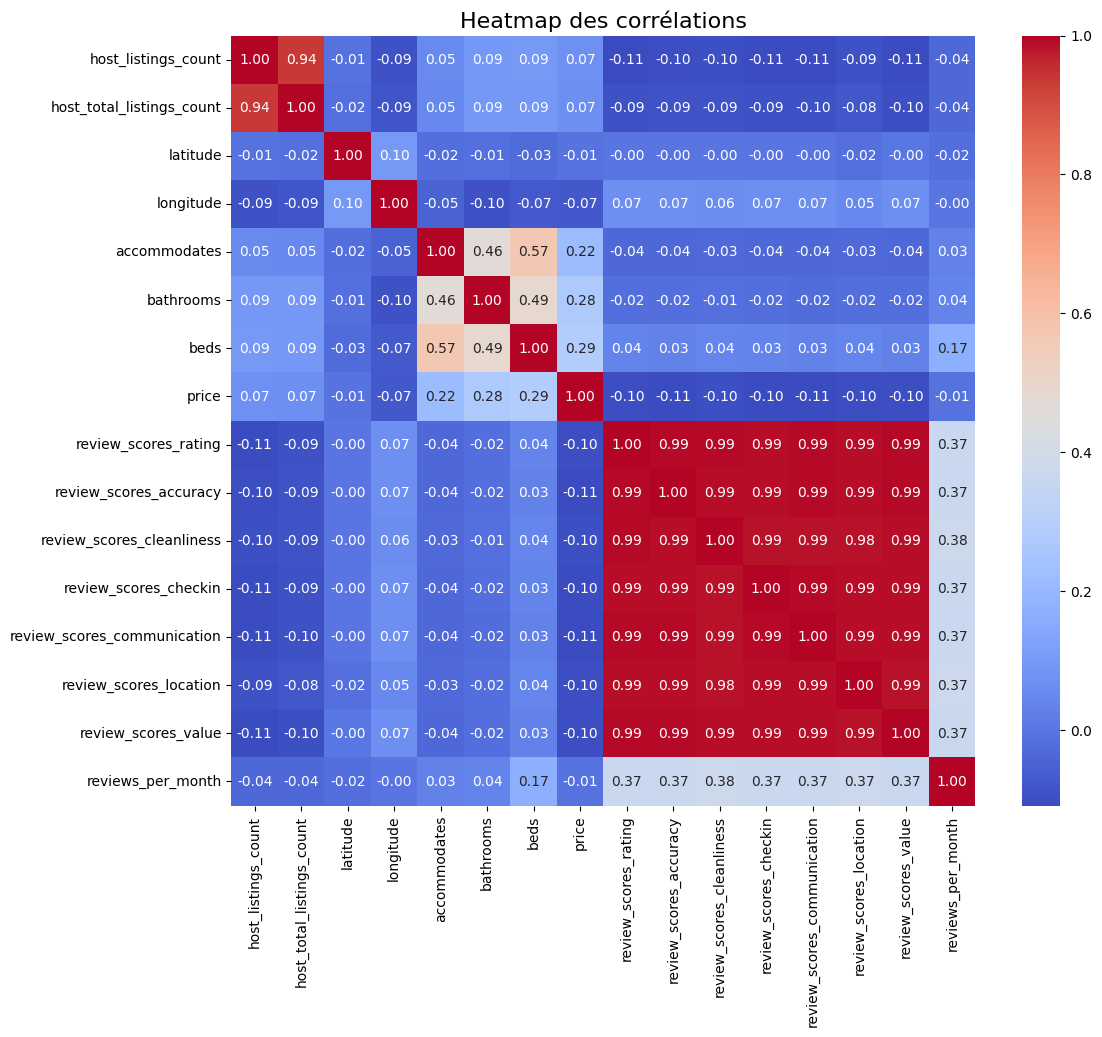

In [32]:
import seaborn as sns

import matplotlib.pyplot as plt

# Création du heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Ajouter un titre
plt.title("Heatmap des corrélations", fontsize=16)

# Afficher le graphique
plt.show()

In [33]:
correlations['price'].sort_values(ascending=False)

price                          1.000000
beds                           0.287114
bathrooms                      0.276157
accommodates                   0.215516
host_listings_count            0.071948
host_total_listings_count      0.068275
latitude                      -0.008980
reviews_per_month             -0.013390
longitude                     -0.074754
review_scores_cleanliness     -0.100123
review_scores_location        -0.103080
review_scores_rating          -0.103182
review_scores_value           -0.104606
review_scores_checkin         -0.104868
review_scores_accuracy        -0.105336
review_scores_communication   -0.106272
Name: price, dtype: float64

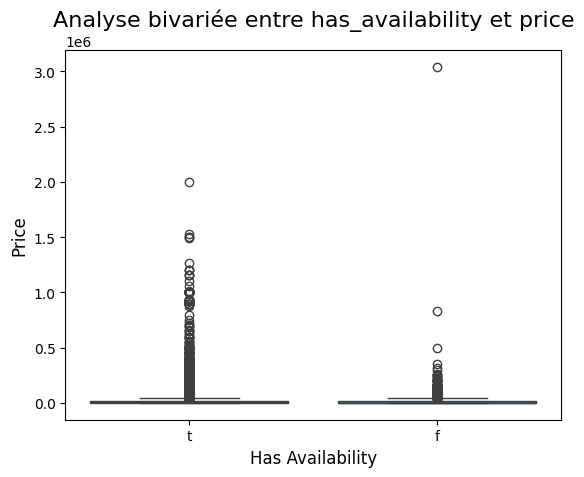

In [34]:
# Analyse bivariée entre has_availability et price
sns.boxplot(x='has_availability', y='price', data=df)

# Ajouter un titre et des labels
plt.title("Analyse bivariée entre has_availability et price", fontsize=16)
plt.xlabel("Has Availability", fontsize=12)
plt.ylabel("Price", fontsize=12)

# Afficher le graphique
plt.show()

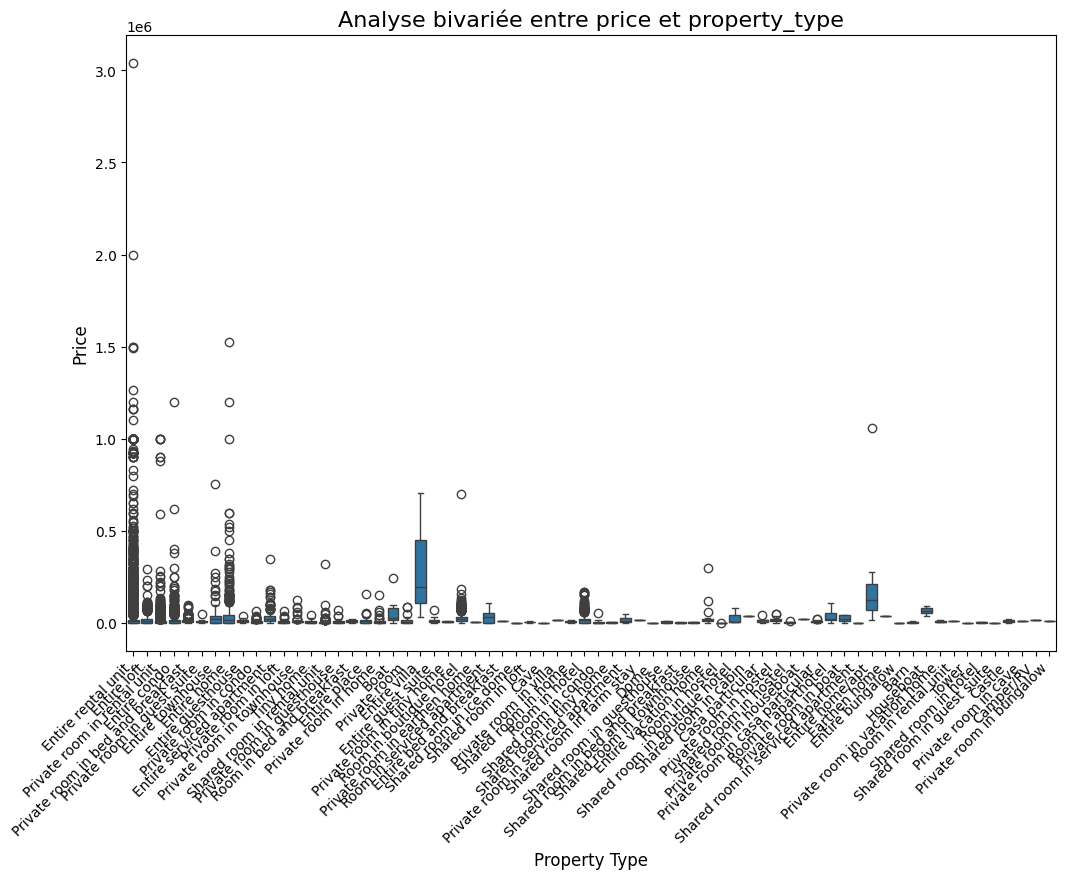

In [35]:
# Analyse bivariée entre price et property_type
plt.figure(figsize=(12, 8))
sns.boxplot(x='property_type', y='price', data=df)

# Rotation des labels pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Ajouter un titre et des labels
plt.title("Analyse bivariée entre price et property_type", fontsize=16)
plt.xlabel("Property Type", fontsize=12)
plt.ylabel("Price", fontsize=12)

# Afficher le graphique
plt.show()

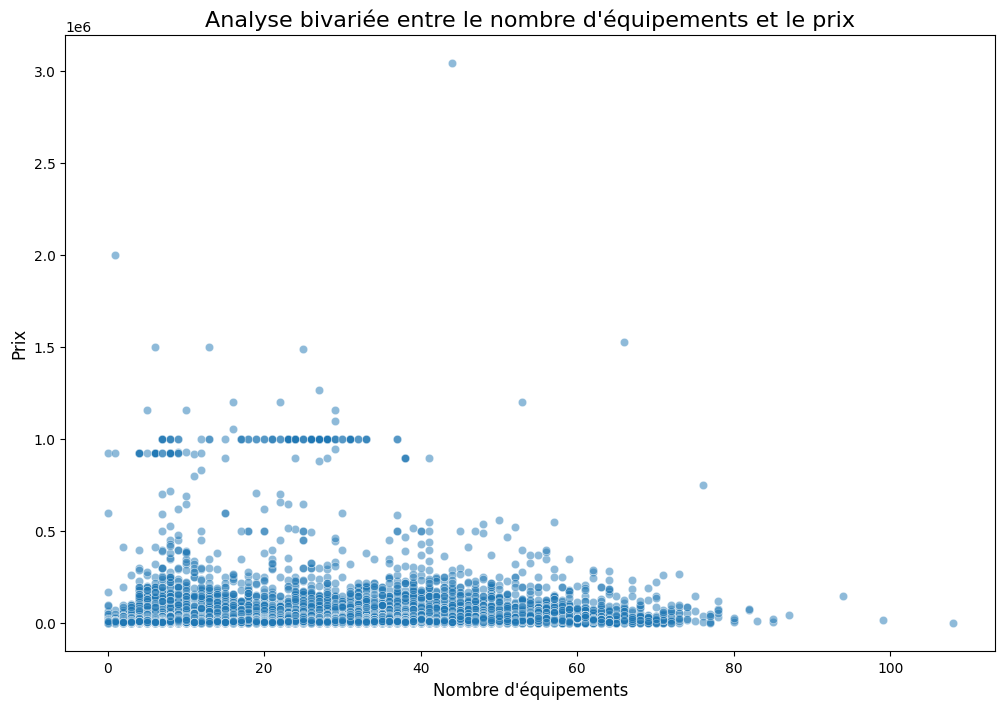

In [36]:
# Compter le nombre d'équipements pour chaque logement
df['amenities_count'] = df['amenities'].apply(lambda x: len(eval(x)))

# Analyse bivariée entre amenities_count et price
plt.figure(figsize=(12, 8))
sns.scatterplot(x='amenities_count', y='price', data=df, alpha=0.5)

# Ajouter un titre et des labels
plt.title("Analyse bivariée entre le nombre d'équipements et le prix", fontsize=16)
plt.xlabel("Nombre d'équipements", fontsize=12)
plt.ylabel("Prix", fontsize=12)

# Afficher le graphique
plt.show()

In [37]:
df.dtypes


host_listings_count            float64
host_total_listings_count      float64
host_has_profile_pic            object
host_identity_verified          object
latitude                       float64
longitude                      float64
property_type                   object
accommodates                     int64
bathrooms                      float64
beds                           float64
amenities                       object
price                          float64
has_availability                object
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
reviews_per_month              float64
amenities_count                  int64
dtype: object

Accomodate , bathrooms, bed, property_type

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sélection des colonnes pertinentes pour la prédiction
features = ['accommodates', 'bathrooms', 'beds']
target = 'price'

# Préparation des données
X = df[features]
y = df[target]

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle de régression linéaire
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 2419777034.1185517
R² Score: 0.08869586473388302
